In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import structure
import solver

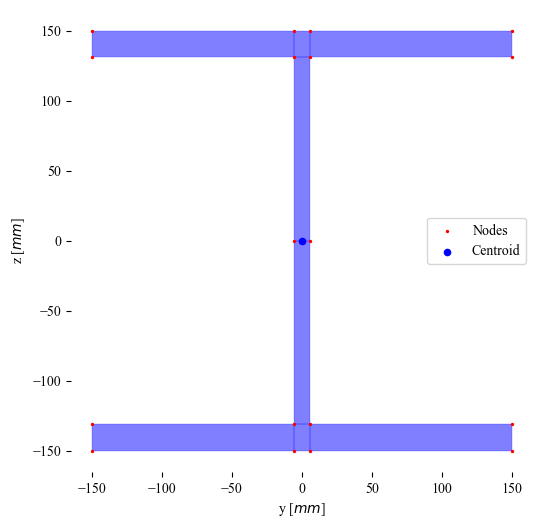

In [2]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=100)
beam.plot()


In [3]:
struc = structure.Cantilever(beam   = beam, 
						     length = 1000,
							 load_DOFs = [8],
							 nodal_loads = [1],
						     number_of_sections_per_elemnt = 4)

In [4]:
non_linear_solver = solver.Nonlinear(struc, constraint="Load",)

In [5]:
increments = [390000,20000,20000,20000,20000]

u_history, lambda_history = non_linear_solver.solve(increments)

  0%|          | 0/5 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 5
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
      Residuals Norm  1.4901189615529982e-07
NR Converged!
----------------------------------------------
Load step 2 of 5
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
      Residuals Norm  5397612.782566371
      NR Iteration  1
         Beam Element  1
            Element iteration  0
      Residuals Norm  1.5832483768463135e-08
NR Converged!
----------------------------------------------
Load step 3 of 5
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
      Residuals Norm  2023866.3914955473
      NR Iteration  1
         Beam Element  1
            Element iteration  0
      Residuals Norm  2.7706846594810486e-08
NR Converged!
------------------------------------------

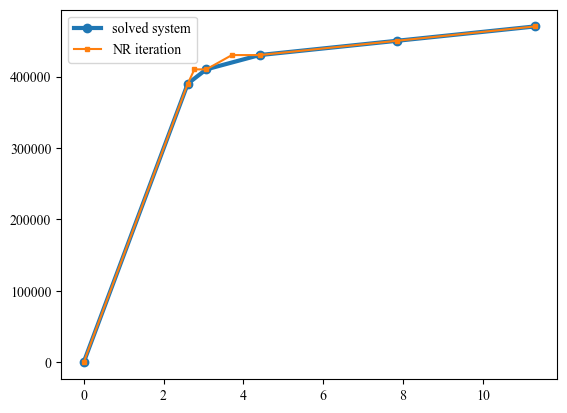

In [6]:
llambda = [0, 390000, 410000, 410000, 430000, 430000, 450000, 470000]
U       = [0,  2.607,  2.774,  3.070,  3.713,  4.404,  7.847, 11.291]

plt.plot(u_history[:,6+2], lambda_history, label="solved system",  marker="o", lw=3)
plt.plot(U, llambda, marker="s", markersize=3, label="NR iteration")

plt.legend()